In [1]:
%matplotlib notebook

import datetime
import locale

import requests
import pandas as pd
import matplotlib.pyplot as plt

# Setting french locale
locale.setlocale(locale.LC_ALL, 'fr_FR')

'fr_FR'

In [2]:
# Getting data
resp = requests.get('https://vigilo.jesuisundesdeux.org/get_issues.php')
df = pd.DataFrame(resp.json())
df.time = pd.to_datetime(df.time, unit='s')

# Filtering out data before 2019-01-01
df = df[df.time.apply(lambda x: x.year) > 2018]

<IPython.core.display.Javascript object>


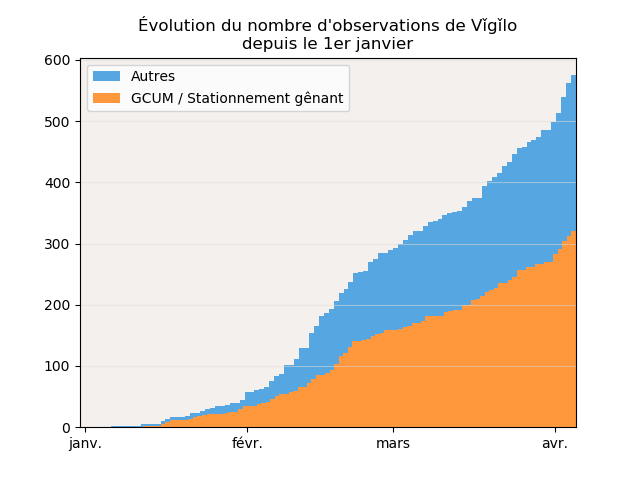

In [4]:
fig, ax = plt.subplots()
nbins = max(df.time.apply(lambda x: x.timetuple().tm_yday))
plt.hist(df.time.apply(lambda x: x.timetuple().tm_yday), cumulative=True, bins=nbins, label='Autres', color="#56a7e1")
plt.hist(df[df.categorie == '2'].time.apply(lambda x: x.timetuple().tm_yday), cumulative=True, bins=nbins, label='GCUM / Stationnement gênant',         color="#ff973d")

plt.gca().legend()
ax.set_facecolor('#f4f0ee')
plt.grid(axis='y', color='#e4dbd5', alpha=0.5)

ticks = [datetime.datetime(year=2019, month=x, day=1).timetuple().tm_yday for x in range(1, 13)]
ticks_labels = [datetime.datetime(year=2019, month=x, day=1).strftime('%b') for x in range(1, 13)]
plt.xticks(ticks, ticks_labels)

ax.set_xlim(0, nbins)

plt.title("Évolution du nombre d'observations de Vǐgǐlo\ndepuis le 1er janvier")

plt.show()